# Standard Bank Credit Scoring Analysis.
##### The objective isto analyze the data in exploring the features that predict loan defaults.

#### About The Data.

 The loan dataset contain loan e-commerce transactions by "XENTE" an e-commerce and financial service app serving 30,000+ customers in Uganda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', None)

In [2]:
# Reading dataset.
df = pd.read_csv('../Train.csv', parse_dates=['TransactionStartTime', 'IssuedDateLoan', 
                                              'PaidOnDate', 'DueDate'])


## Data Cleaning and Validation.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerId             2100 non-null   object        
 1   TransactionStartTime   2100 non-null   datetime64[ns]
 2   Value                  2100 non-null   float64       
 3   Amount                 2100 non-null   float64       
 4   TransactionId          2100 non-null   object        
 5   BatchId                2100 non-null   object        
 6   SubscriptionId         2100 non-null   object        
 7   CurrencyCode           2100 non-null   object        
 8   CountryCode            2100 non-null   int64         
 9   ProviderId             2100 non-null   object        
 10  ProductId              2100 non-null   object        
 11  ProductCategory        2100 non-null   object        
 12  ChannelId              2100 non-null   object        
 13  Tra

The target feature contain 612 observations with missing values which will be dropped.

In [4]:

df = df[df['IsDefaulted'].notnull()]
print('The data consist of '+str(df.shape[0])+ ' rows and '+str(df.shape[1])+' columns')

df.head()

The data consist of 1488 rows and 27 columns


,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
9,CustomerId_258,2018-10-18 16:11:55,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-18 16:11:53,10016.0,UGX,LoanId_62,2018-10-22 09:13:17,1.0,InvestorId_3,2018-11-17 16:11:04,NaN,PayBackId_1791,ThirdPartyId_648,0.0,0.0
10,CustomerId_258,2018-10-18 16:11:55,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-18 16:11:53,584.0,UGX,LoanId_62,2018-10-23 07:34:35,1.0,InvestorId_3,2018-11-17 16:11:04,NaN,PayBackId_1067,ThirdPartyId_68,0.0,0.0
11,CustomerId_258,2018-10-18 16:11:55,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-18 16:11:53,100.0,UGX,LoanId_62,2018-10-25 08:58:07,1.0,InvestorId_3,2018-11-17 16:11:04,NaN,PayBackId_928,ThirdPartyId_1883,0.0,0.0
13,CustomerId_233,2018-10-19 10:18:33,5150.0,-5150.0,TransactionId_1598,BatchId_1458,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-19 10:18:31,5614.0,UGX,LoanId_22,2018-10-30 06:50:37,1.0,InvestorId_3,2018-11-18 10:16:06,NaN,PayBackId_647,ThirdPartyId_1484,0.0,0.0
14,CustomerId_233,2018-10-19 11:01:30,515.0,-515.0,TransactionId_2115,BatchId_1672,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2018-10-19 11:01:28,544.0,UGX,LoanId_368,2018-10-22 16:11:37,1.0,InvestorId_3,2018-11-18 11:00:56,NaN,PayBackId_1267,ThirdPartyId_949,0.0,0.0


In [5]:

df.columns[df.isnull().sum()>0]

Index(['DueDate', 'LoanApplicationId', 'ThirdPartyId'], dtype='object')

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
TransactionStartTime,1488,2019-01-27 03:43:49.926075392,2018-10-18 16:11:55,2018-12-24 09:13:58,2019-02-04 23:16:30,2019-02-27 12:45:43.500000,2019-03-31 12:16:33,NaN
Value,1488.0,52180.867608,100.0,1000.0,4860.0,12000.0,2500000.0,167099.60978
Amount,1488.0,-52070.850806,-2500000.0,-12000.0,-4750.0,-1000.0,-100.0,167113.160155
CountryCode,1488.0,256.0,256.0,256.0,256.0,256.0,256.0,0.0
TransactionStatus,1488.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
IssuedDateLoan,1488,2019-01-27 03:44:24.656585984,2018-10-18 16:11:53,2018-12-24 09:13:55,2019-02-04 23:16:28,2019-02-27 12:45:42.750000128,2019-03-31 12:16:32,NaN
AmountLoan,1488.0,11827.247312,50.0,1113.75,2800.0,10500.0,2760000.0,76665.059508
PaidOnDate,1488,2019-02-21 23:43:30.029570048,2018-10-22 09:13:17,2019-01-20 11:25:15.249999872,2019-02-22 03:48:24,2019-03-28 14:00:08.500000,2019-07-15 12:51:23,NaN
IsFinalPayBack,1488.0,0.731855,0.0,0.0,1.0,1.0,1.0,0.443143
DueDate,1486,2019-02-26 02:46:05.534993408,2018-11-17 16:11:04,2019-01-23 09:13:51,2019-03-06 23:16:19,2019-03-29 12:45:39,2019-04-30 12:16:26,NaN


In [7]:
df['IsDefaulted'] = df['IsDefaulted'].astype('int32')
df['IsDefaulted'].value_counts(normalize=False)

IsDefaulted
0    1310
1     178
Name: count, dtype: int64

In [8]:
df['IsThirdPartyConfirmed'] = df['IsThirdPartyConfirmed'].astype('int32')
df['IsFinalPayBack'] = df['IsFinalPayBack'].astype('int32')

df['IsThirdPartyConfirmed'].value_counts(normalize=True)

IsThirdPartyConfirmed
1    0.982527
0    0.017473
Name: proportion, dtype: float64

In [9]:
df['TransactionStatus'].value_counts(normalize=True)

TransactionStatus
1    1.0
Name: proportion, dtype: float64

In [10]:
df.select_dtypes('object').columns

Index(['CustomerId', 'TransactionId', 'BatchId', 'SubscriptionId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'Currency', 'LoanId', 'InvestorId', 'LoanApplicationId',
       'PayBackId', 'ThirdPartyId'],
      dtype='object')

In [11]:
print(f" Unique CustomerId is: {df.CustomerId.nunique()}")
print(f" Unique Transaction Id is: {df.TransactionId.nunique()}")
print(f" Unique Subscrption Id is: {df.SubscriptionId.nunique()}")
print(f" Unique Payback Id is: {df.PayBackId.nunique()}")
print(f" Unique ThirdParty Id is: {df.ThirdPartyId.nunique()}")
print(f" Unique Loan Id is: {df.LoanId.nunique()}")
print(f" Unique Batch Id is: {df.BatchId.nunique()}")
print(f" Unique Channel Id is: {df.ChannelId.nunique()}")
print(f" Unique Investor Id is: {df.InvestorId.nunique()}")
print(f" Unique Product Id is: {df.ProductId.nunique()}")
print(f" Unique Loan Application Id is: {df.LoanApplicationId.nunique()}")
print(f" Unique Product Category: {df.ProductCategory.unique()}")

 Unique CustomerId is: 239
 Unique Transaction Id is: 1153
 Unique Subscrption Id is: 5
 Unique Payback Id is: 1485
 Unique ThirdParty Id is: 1481
 Unique Loan Id is: 1159
 Unique Batch Id is: 1126
 Unique Channel Id is: 1
 Unique Investor Id is: 3
 Unique Product Id is: 15
 Unique Loan Application Id is: 1156
 Unique Product Category: ['airtime' 'data_bundles' 'tv' 'utility_bill' 'movies' 'retail'
 'financial_services']


In [12]:
df.loc[df['DueDate'].isnull(), :]

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
954,CustomerId_369,2019-02-01 17:23:23,1000.0,-1000.0,TransactionId_712,BatchId_260,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-02-01 17:23:07,1055.0,UGX,LoanId_943,2019-02-05 11:42:02,1,InvestorId_1,NaT,LoanApplicationId_1085,PayBackId_1045,ThirdPartyId_1317,1,0
2031,CustomerId_259,2019-03-22 16:45:26,100000.0,-100000.0,TransactionId_370,BatchId_2290,SubscriptionId_1,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-22 16:45:05,110500.0,UGX,LoanId_1225,2019-04-04 19:36:29,1,InvestorId_2,NaT,LoanApplicationId_813,PayBackId_1170,ThirdPartyId_1904,1,0


In [13]:
df.dropna(axis=0, inplace=True)

## Exploratory Analysis.

Exploring features that can be used to classify customer loan behaviour.

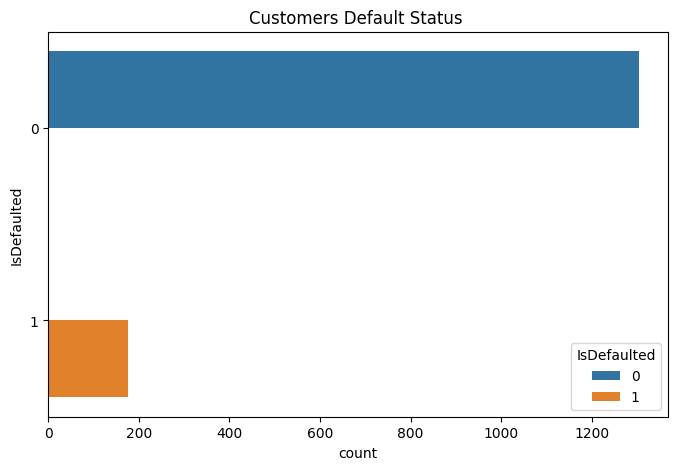

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='IsDefaulted', hue='IsDefaulted')
plt.title('Customers Default Status ')
plt.show()

##### The majorty ofcustomers loan are below one million Ugadan shilling.

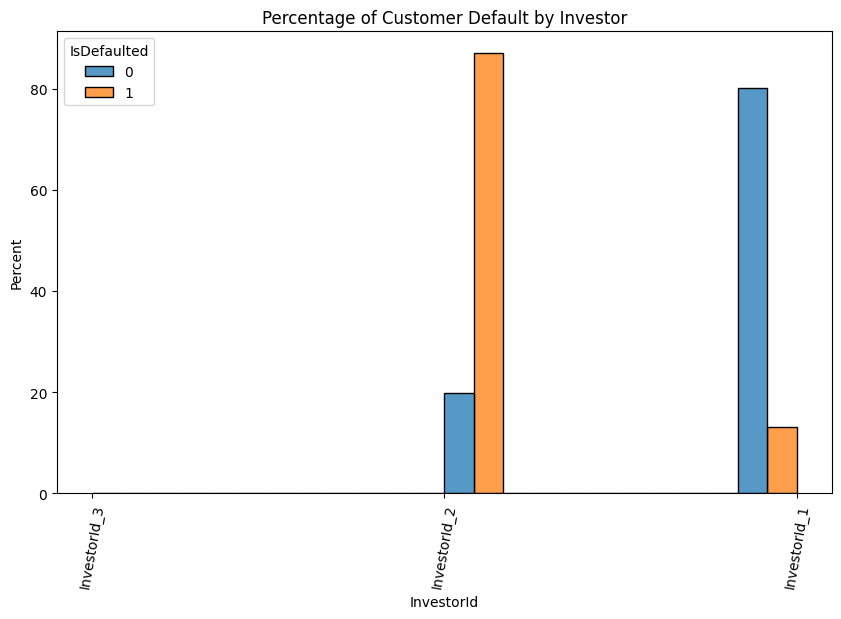

In [15]:
plt.figure(figsize=(10,6))
sns.histplot( x=df['InvestorId'], hue=df['IsDefaulted'],  stat='percent', discrete=False,  
             common_norm=False, multiple='dodge')
plt.title('Percentage of Customer Default by Investor')
plt.xticks(rotation=80)
plt.show()

**Investor_2 has the largest percetage of loan defaulters.**

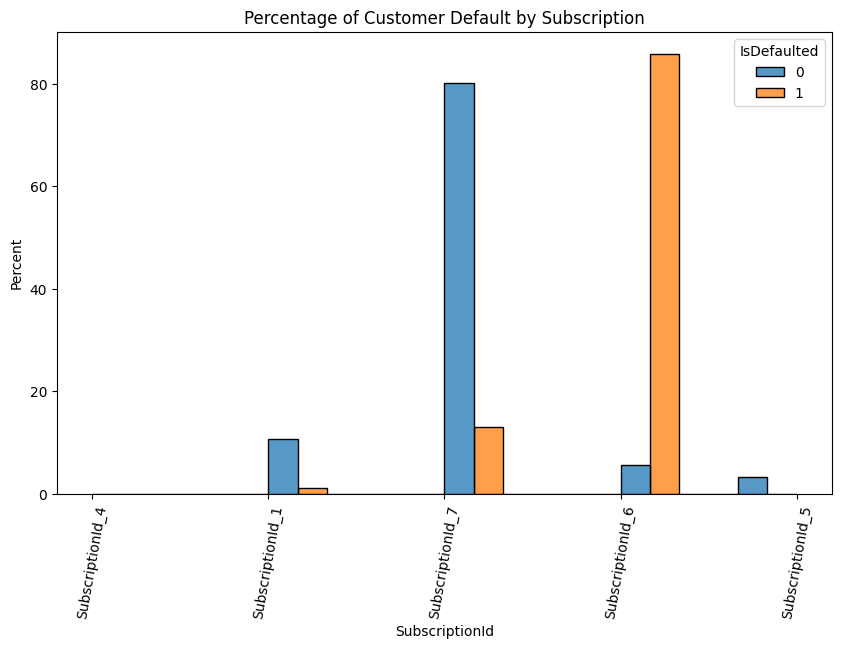

In [16]:
plt.figure(figsize=(10,6))
sns.histplot( x=df['SubscriptionId'], hue=df['IsDefaulted'],  stat='percent', discrete=False,  
             common_norm=False, multiple='dodge')
plt.title('Percentage of Customer Default by Subscription')
plt.xticks(rotation=80)
plt.show()

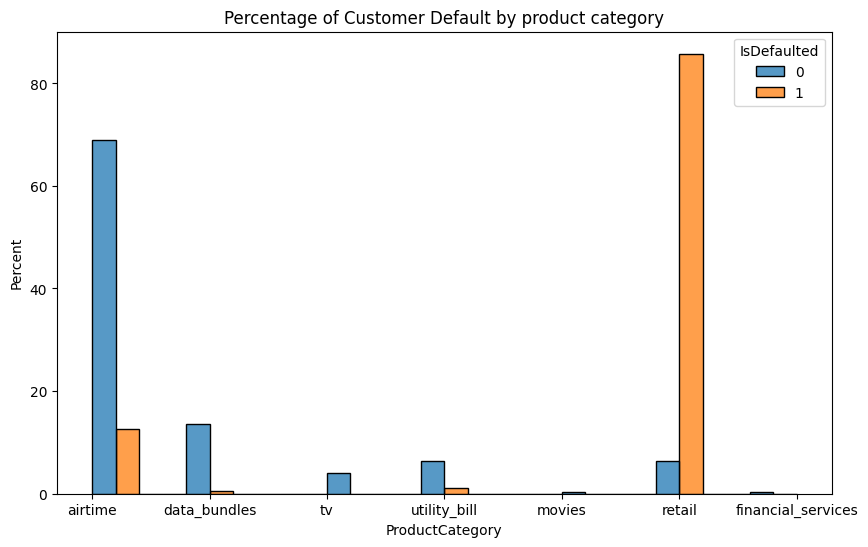

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, hue='IsDefaulted', x='ProductCategory',  stat='percent', discrete=False, binwidth=0.4, 
             common_norm=False, multiple='dodge')
plt.title('Percentage of Customer Default by product category')
plt.show()

**Most customers with default loan purchase retail Products.**

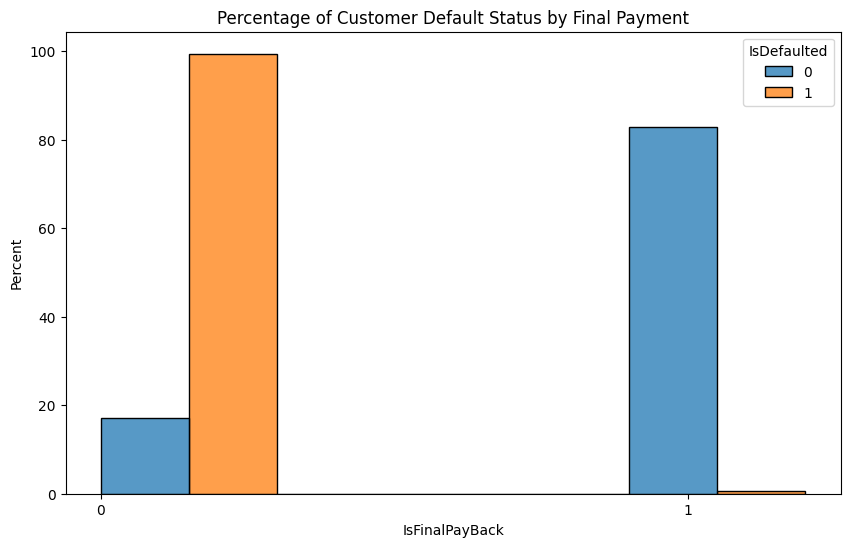

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, hue='IsDefaulted', x='IsFinalPayBack',  stat='percent', discrete=False, binwidth=0.3, 
             common_norm=False, multiple='dodge')
plt.title('Percentage of Customer Default Status by Final Payment')
plt.xticks([0,1])
plt.show()

**Almost all defaulted customers did not pay up their loan.**

In [19]:
df.IssuedDateLoan = df.IssuedDateLoan.dt.date
df.PaidOnDate = df.PaidOnDate.dt.date
df.DueDate = df.DueDate.dt.date

#### Observations:
* Customers can have more than one loan and payment can be installment.
  
* Specific loan has grace of 30 days for payment to be made.
  
* The loan paid multiple times with no final payback before/on due date  and confirmed a thirdparty will 
  
  be flag defaulted. While loan with single payment with final payback is not flag defaulted.

#### Actions:
We can create features on these ideas as:

A binary feature for 'PaidOnDate greater than DueDate' as paidlate.

The count of multiple payment of each LoanApplication Id as num_loan.

A binary feature for flagging the last payment made by a particular customer  *late* if the date wa after the loan due date.  

#### Insights:
* One customer can have multiple subcriptions. Hence subscription id six(6) is the most category withload default.
  
* Loan issuer r network owner with inestor id two(2) has the largest percentage of defaulted loans.
  
*  Most customers with default loan purchase retail Products.





In [20]:
# Feature creation.
df['PaidLate'] = df.PaidOnDate >= df.DueDate

df['days_from_due'] = df.PaidOnDate - df.DueDate
d = [ str(x)[:3] for x in df['days_from_due']]
d= [x.split(' ')[0] for x in d]
df['days_from_due'] = np.array([x.split(':')[0] for x in d], dtype='int32')

mapping_dict = dict(df.groupby('LoanId')['BatchId'].count())
df['num_batch'] = df.LoanId.map(mapping_dict)

mapping_dict = dict(df.groupby('CustomerId')['LoanApplicationId'].nunique())
df['num_loan'] = df.CustomerId.map(mapping_dict)

df['cust_loanappid'] = df['CustomerId'].astype(str) + '_' + df['LoanApplicationId'].astype('str')
mapping_dict = dict(df.groupby('cust_loanappid')['PaidOnDate'].max())
df['last_payment'] = df['cust_loanappid'].map(mapping_dict)
df['last_payment_late'] = np.where(df['last_payment'] > df.DueDate, 1, 0)

pv = df.pivot_table(values='BatchId', index=['SubscriptionId', 'InvestorId', 'LoanApplicationId', 'IsDefaulted', 'PaidLate', 'last_payment_late'], 
                    columns=['IsFinalPayBack'], aggfunc='count')

pv.head(10)

IsFinalPayBack                                                                                0   
SubscriptionId   InvestorId   LoanApplicationId      IsDefaulted PaidLate last_payment_late       
SubscriptionId_1 InvestorId_2 LoanApplicationId_101  0           True     1                 NaN  \
                              LoanApplicationId_1015 0           False    0                 NaN   
                              LoanApplicationId_1020 0           True     1                 NaN   
                              LoanApplicationId_1026 0           True     1                 NaN   
                              LoanApplicationId_1035 0           True     1                 NaN   
                              LoanApplicationId_1042 0           True     1                 NaN   
                              LoanApplicationId_1047 0           True     1                 NaN   
                              LoanApplicationId_1070 0           True     1                 NaN   
                              LoanApplicationId_109  0           False    0                 NaN   
                              LoanApplicationId_1090 0           True     1                 NaN   

IsFinalPayBack                                                                                 1  
SubscriptionId   InvestorId   LoanApplicationId      IsDefaulted PaidLate last_payment_late       
SubscriptionId_1 InvestorId_2 LoanApplicationId_101  0           True     1                  1.0  
                              LoanApplicationId_1015 0           False    0                  1.0  
                              LoanApplicationId_1020 0           True     1                  1.0  
                              LoanApplicationId_1026 0           True     1                  1.0  
                              LoanApplicationId_1035 0           True     1                  1.0  
                              LoanApplicationId_1042 0           True     1                  1.0  
                              LoanApplicationId_1047 0           True     1                  1.0  
                              LoanApplicationId_1070 0           True     1                  1.0  
                              LoanApplicationId_109  0           False    0                  1.0  
                              LoanApplicationId_1090 0           True     1                  1.0

In [21]:
pv.tail(20)

IsFinalPayBack                                                                                0   
SubscriptionId   InvestorId   LoanApplicationId     IsDefaulted PaidLate last_payment_late        
SubscriptionId_7 InvestorId_1 LoanApplicationId_971 0           False    0                  NaN  \
                              LoanApplicationId_972 0           True     1                  NaN   
                              LoanApplicationId_973 0           True     1                  NaN   
                              LoanApplicationId_974 0           False    0                  NaN   
                              LoanApplicationId_977 0           False    0                  NaN   
                              LoanApplicationId_978 0           False    0                  NaN   
                              LoanApplicationId_979 0           False    0                  NaN   
                              LoanApplicationId_980 1           True     1                  1.0   
                              LoanApplicationId_981 0           False    0                  NaN   
                              LoanApplicationId_982 0           True     1                  NaN   
                              LoanApplicationId_983 0           False    0                  NaN   
                              LoanApplicationId_986 0           False    0                  NaN   
                              LoanApplicationId_987 0           False    0                  NaN   
                              LoanApplicationId_988 0           False    0                  NaN   
                              LoanApplicationId_989 0           False    0                  NaN   
                              LoanApplicationId_991 0           False    0                  NaN   
                              LoanApplicationId_992 0           False    0                  NaN   
                              LoanApplicationId_995 0           False    0                  NaN   
                              LoanApplicationId_996 0           False    0                  NaN   
                              LoanApplicationId_999 0           False    0                  NaN   

IsFinalPayBack                                                                                1  
SubscriptionId   InvestorId   LoanApplicationId     IsDefaulted PaidLate last_payment_late       
SubscriptionId_7 InvestorId_1 LoanApplicationId_971 0           False    0                  1.0  
                              LoanApplicationId_972 0           True     1                  1.0  
                              LoanApplicationId_973 0           True     1                  1.0  
                              LoanApplicationId_974 0           False    0                  1.0  
                              LoanApplicationId_977 0           False    0                  1.0  
                              LoanApplicationId_978 0           False    0                  1.0  
                              LoanApplicationId_979 0           False    0                  1.0  
                              LoanApplicationId_980 1           True     1                  NaN  
                              LoanApplicationId_981 0           False    0                  1.0  
                              LoanApplicationId_982 0           True     1                  1.0  
                              LoanApplicationId_983 0           False    0                  1.0  
                              LoanApplicationId_986 0           False    0                  1.0  
                              LoanApplicationId_987 0           False    0                  1.0  
                              LoanApplicationId_988 0           False    0                  1.0  
                              LoanApplicationId_989 0           False    0                  1.0  
                              LoanApplicationId_991 0           False    0                  1.0  
                              LoanApplicationId_992 0    

In [22]:
cols_to_drop = ['Amount', 'TransactionId', 'ThirdPartyId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ChannelId', 'TransactionStatus', 'Currency',
                'PayBackId']
df.drop(cols_to_drop, axis=1, inplace=True)

In [23]:
df[df['LoanId'] == 'LoanId_49']

,CustomerId,TransactionStartTime,Value,BatchId,SubscriptionId,ProductId,ProductCategory,IssuedDateLoan,AmountLoan,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,IsThirdPartyConfirmed,IsDefaulted,PaidLate,days_from_due,num_batch,num_loan,cust_loanappid,last_payment,last_payment_late
1503,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,16000.0,LoanId_49,2019-02-28,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,False,-27,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1
1504,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,16000.0,LoanId_49,2019-03-07,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,False,-20,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1
1505,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,16000.0,LoanId_49,2019-03-14,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,False,-13,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1
1506,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,16000.0,LoanId_49,2019-03-21,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,False,-6,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1
1507,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,16000.0,LoanId_49,2019-03-28,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,True,1,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1
1508,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,12000.0,LoanId_49,2019-06-27,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,True,92,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1
1509,CustomerId_10,2019-02-25 14:13:21,192000.0,BatchId_1850,SubscriptionId_6,ProductId_18,retail,2019-02-25,5000.0,LoanId_49,2019-06-28,0,InvestorId_2,2019-03-27,LoanApplicationId_1364,1,1,True,93,7,1,CustomerId_10_LoanApplicationId_1364,2019-06-28,1


In [24]:
# fd = df.iloc[np.where((df['IsFinalPayBack'] == 1)  & (df['PaidLate'] == True) )]

df.head()

,CustomerId,TransactionStartTime,Value,BatchId,SubscriptionId,ProductId,ProductCategory,IssuedDateLoan,AmountLoan,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,IsThirdPartyConfirmed,IsDefaulted,PaidLate,days_from_due,num_batch,num_loan,cust_loanappid,last_payment,last_payment_late
15,CustomerId_233,2018-10-22 16:04:25,5000.0,BatchId_775,SubscriptionId_4,ProductId_7,airtime,2018-10-22,5375.0,LoanId_317,2018-10-30,1,InvestorId_3,2018-11-21,LoanApplicationId_1629,0,0,False,-22,1,39,CustomerId_233_LoanApplicationId_1629,2018-10-30,0
17,CustomerId_305,2018-10-23 13:12:23,500.0,BatchId_2016,SubscriptionId_1,ProductId_7,airtime,2018-10-23,543.0,LoanId_1619,2018-10-23,1,InvestorId_2,2018-11-22,LoanApplicationId_136,0,0,False,-30,1,2,CustomerId_305_LoanApplicationId_136,2018-10-23,0
18,CustomerId_27,2018-10-23 15:20:58,1000.0,BatchId_1675,SubscriptionId_1,ProductId_7,airtime,2018-10-23,1085.0,LoanId_1438,2018-10-23,1,InvestorId_2,2018-11-22,LoanApplicationId_1171,0,0,False,-30,1,10,CustomerId_27_LoanApplicationId_1171,2018-10-23,0
19,CustomerId_27,2018-10-23 15:31:27,500.0,BatchId_2449,SubscriptionId_1,ProductId_7,airtime,2018-10-24,543.0,LoanId_1304,2018-10-24,1,InvestorId_2,2018-11-23,LoanApplicationId_702,0,0,False,-30,1,10,CustomerId_27_LoanApplicationId_702,2018-10-24,0
20,CustomerId_27,2018-10-24 06:56:02,500.0,BatchId_1564,SubscriptionId_1,ProductId_4,data_bundles,2018-10-24,543.0,LoanId_1436,2018-10-24,1,InvestorId_2,2018-11-23,LoanApplicationId_508,0,0,False,-30,1,10,CustomerId_27_LoanApplicationId_508,2018-10-24,0


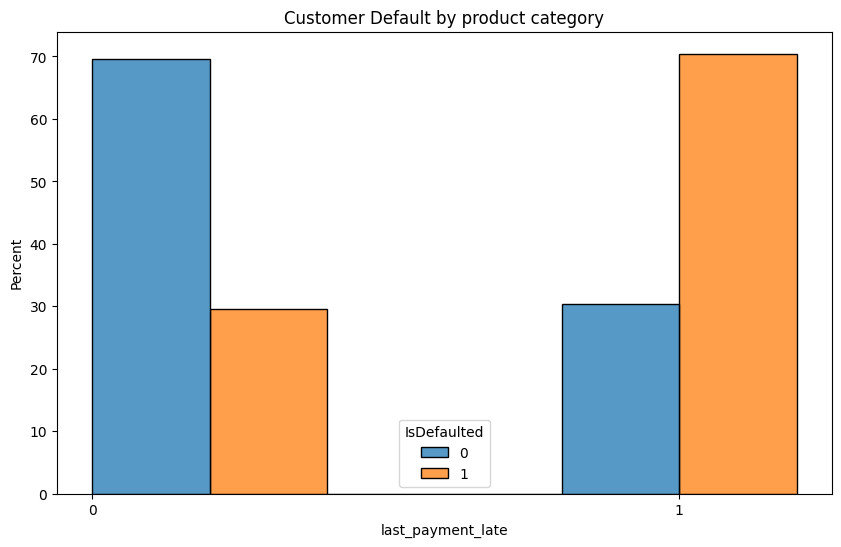

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, hue='IsDefaulted', x='last_payment_late',  stat='percent', discrete=False, binwidth=0.4, 
             common_norm=False, multiple='dodge')
plt.title('Customer Default by product category')
plt.xticks([0,1])
plt.show()

In [26]:
features = ['SubscriptionId', 'InvestorId', 'ProductId' , 'ProductCategory', 'LoanApplicationId', 'IsFinalPayBack', 'IsThirdPartyConfirmed', 'num_loan', 'num_batch', 
              'last_payment_late', 'PaidLate', 'IsDefaulted']

df_final = df[features]
df_final.to_csv('./cleaned_data.csv', index=False)